<center><h2> Graduate Admissions </h2> </center>

https://www.kaggle.com/mohansacharya/graduate-admissions

Variables
* Serial No.
* GRE Scores (290 to 340)
* TOEFL Scores (92 to 120)
* University Rating (1 to 5)
* Statement of Purpose: SOP (1 to 5)
* Letter of Recommendation Strength: LOR (1 to 5)
* Undergraduate CGPA-Cumulative Grade Point Average (out of 10)
* Research Experience (0 or 1)
* Chance of Admit (0 to 1)

Libraries

In [26]:
install.packages('questionr')
install.packages('gbm')
install.packages('ggplot2')
install.packages('dplyr')
install.packages('plyr')

Installing package into 'C:/Users/sitar/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'questionr' is in use and will not be installed"Installing package into 'C:/Users/sitar/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'gbm' is in use and will not be installed"Installing package into 'C:/Users/sitar/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'ggplot2' is in use and will not be installed"Installing package into 'C:/Users/sitar/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'dplyr' is in use and will not be installed"Installing package into 'C:/Users/sitar/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'plyr' is in use and will not be installed"

In [27]:
library(dplyr)
library('randomForest')
library(ggplot2)
library('questionr')
library('gbm')
library('plyr')

<h3> I. Preprocessing and Exploratory Data Analysis </h3>

Loading dataset

In [28]:
df<-read.csv('C:\\Users\\sitar\\Desktop\\Projects\\Graduate Admissions\\Admission_Predict.csv')

There are 400 rows and 9 columns in this dataset

In [29]:
dim(df)

[1] 400   9

First 6 rows of data

In [30]:
head(df)

Serial.No.,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.90


Datatypes of each column

In [31]:
sapply(df, class)

Serial.No.         GRE.Score       TOEFL.Score University.Rating 
        "integer"         "integer"         "integer"         "integer" 
              SOP               LOR              CGPA          Research 
        "numeric"         "numeric"         "numeric"         "integer" 
  Chance.of.Admit 
        "numeric"

Number of nulls in each column

In [32]:
sapply(df, function(x) sum(is.na(x)))

Serial.No.         GRE.Score       TOEFL.Score University.Rating 
                0                 0                 0                 0 
              SOP               LOR              CGPA          Research 
                0                 0                 0                 0 
  Chance.of.Admit 
                0

Since there are no nulls we don't need to do anything more

Summary statistics of the data

In [33]:
summary(df)

   Serial.No.      GRE.Score      TOEFL.Score    University.Rating
 Min.   :  1.0   Min.   :290.0   Min.   : 92.0   Min.   :1.000    
 1st Qu.:100.8   1st Qu.:308.0   1st Qu.:103.0   1st Qu.:2.000    
 Median :200.5   Median :317.0   Median :107.0   Median :3.000    
 Mean   :200.5   Mean   :316.8   Mean   :107.4   Mean   :3.087    
 3rd Qu.:300.2   3rd Qu.:325.0   3rd Qu.:112.0   3rd Qu.:4.000    
 Max.   :400.0   Max.   :340.0   Max.   :120.0   Max.   :5.000    
      SOP           LOR             CGPA          Research     
 Min.   :1.0   Min.   :1.000   Min.   :6.800   Min.   :0.0000  
 1st Qu.:2.5   1st Qu.:3.000   1st Qu.:8.170   1st Qu.:0.0000  
 Median :3.5   Median :3.500   Median :8.610   Median :1.0000  
 Mean   :3.4   Mean   :3.453   Mean   :8.599   Mean   :0.5475  
 3rd Qu.:4.0   3rd Qu.:4.000   3rd Qu.:9.062   3rd Qu.:1.0000  
 Max.   :5.0   Max.   :5.000   Max.   :9.920   Max.   :1.0000  
 Chance.of.Admit 
 Min.   :0.3400  
 1st Qu.:0.6400  
 Median :0.7300  
 Mean   :0.

In [34]:
dfGRE<-count(df, vars='GRE.Score')
dfGRE<-dfGRE[order(dfGRE$freq),]
dfGRE$Percentage<-(dfGRE$freq/sum(dfGRE$freq))*100
dfGRE$Percentage<- paste(as.character(dfGRE$Percentage), '%', '')
rownames(dfGRE)<-NULL
dfGRE

GRE.Score,freq,Percentage
293,1,0.25 %
337,1,0.25 %
290,2,0.5 %
294,2,0.5 %
339,3,0.75 %
295,4,1 %
297,4,1 %
333,4,1 %
335,4,1 %
338,4,1 %


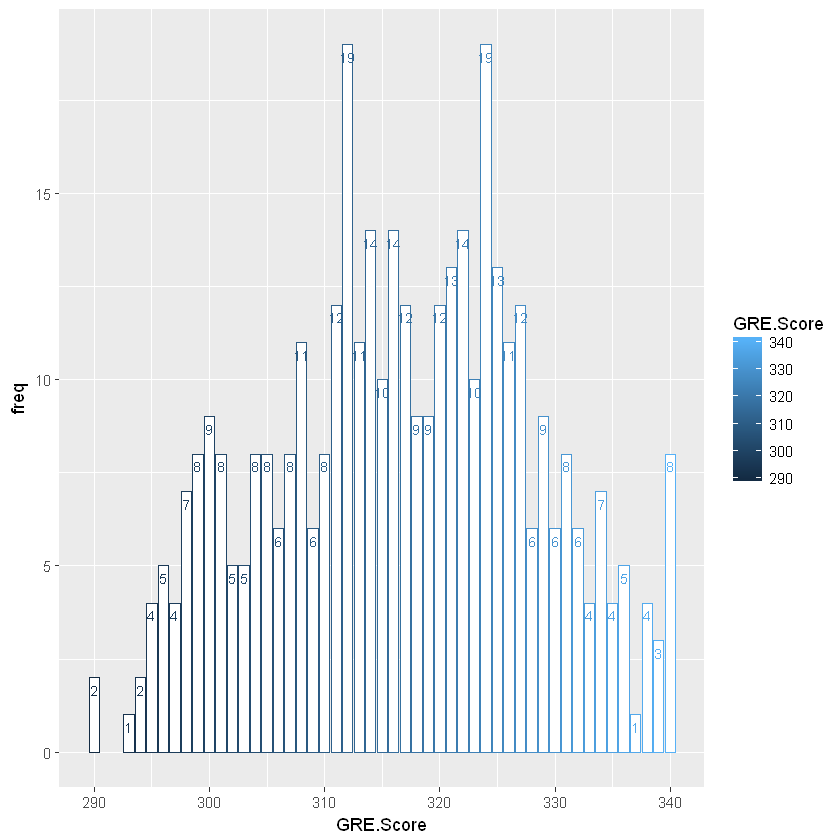

In [35]:
p<-ggplot(data=dfGRE, aes(x=GRE.Score, y=freq, color=GRE.Score)) +geom_bar(stat="identity", fill="white")+
geom_text(aes(label=freq), vjust=1.6,position = position_dodge(0.1), size=3.0)
p

In [36]:
dfTOEFL<-count(df, vars='TOEFL.Score')
dfTOEFL<-dfTOEFL[order(dfTOEFL$freq),]
dfTOEFL$Percentage<-(dfTOEFL$freq/sum(dfTOEFL$freq))*100
dfTOEFL$Percentage<- paste(as.character(dfTOEFL$Percentage), '%', '')
rownames(dfTOEFL)<-NULL
dfTOEFL

TOEFL.Score,freq,Percentage
92,1,0.25 %
94,1,0.25 %
93,2,0.5 %
95,2,0.5 %
96,4,1 %
97,6,1.5 %
117,7,1.75 %
120,8,2 %
98,9,2.25 %
115,9,2.25 %


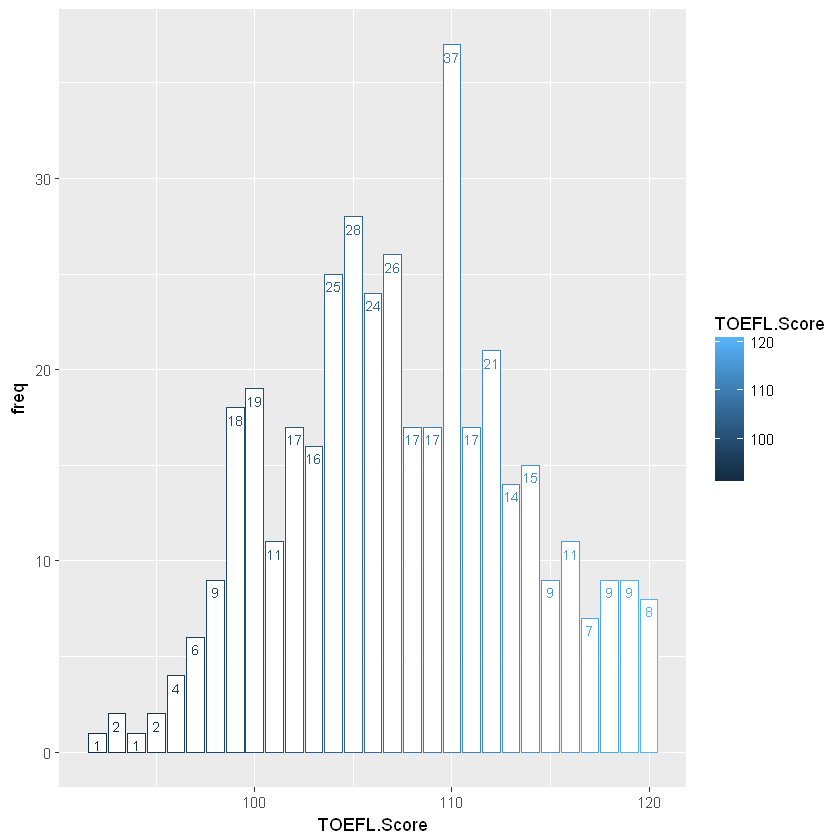

In [37]:
p<-ggplot(data=dfTOEFL, aes(x=TOEFL.Score, y=freq, color=TOEFL.Score)) +geom_bar(stat="identity", fill="white")+
geom_text(aes(label=freq), vjust=1.6,position = position_dodge(0.9), size=3.0)
p

In [38]:
dfRating<-count(df, vars='University.Rating')
dfRating<-dfRating[order(dfRating$freq),]
dfRating$Percentage<-(dfRating$freq/sum(dfRating$freq))*100
dfRating$Percentage<- paste(as.character(dfRating$Percentage), '%', '')
rownames(dfRating)<-NULL
dfRating

University.Rating,freq,Percentage
1,26,6.5 %
5,60,15 %
4,74,18.5 %
2,107,26.75 %
3,133,33.25 %


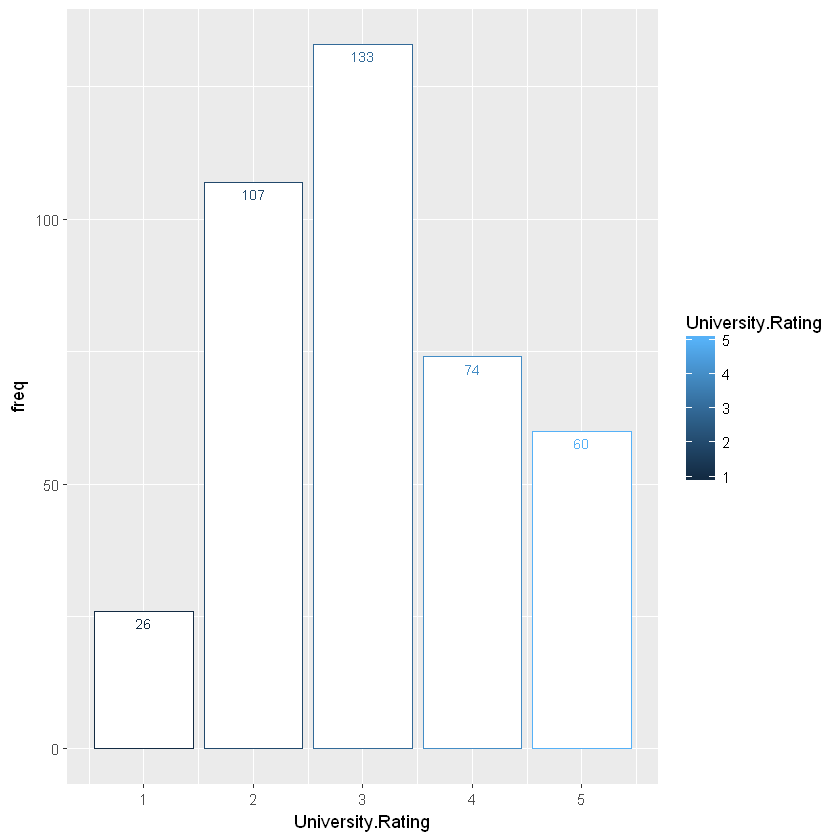

In [39]:
p<-ggplot(data=dfRating, aes(x=University.Rating, y=freq, color=University.Rating)) +geom_bar(stat="identity", fill="white")+
geom_text(aes(label=freq), vjust=1.6,position = position_dodge(0.9), size=3.0)
p

In [40]:
dfResearch<-count(df, vars='Research')
dfResearch$Percentage<-(dfResearch$freq/sum(dfResearch$freq))*100
dfResearch$Percentage<- paste(as.character(dfResearch$Percentage), '%', '')
dfResearch

Research,freq,Percentage
0,181,45.25 %
1,219,54.75 %


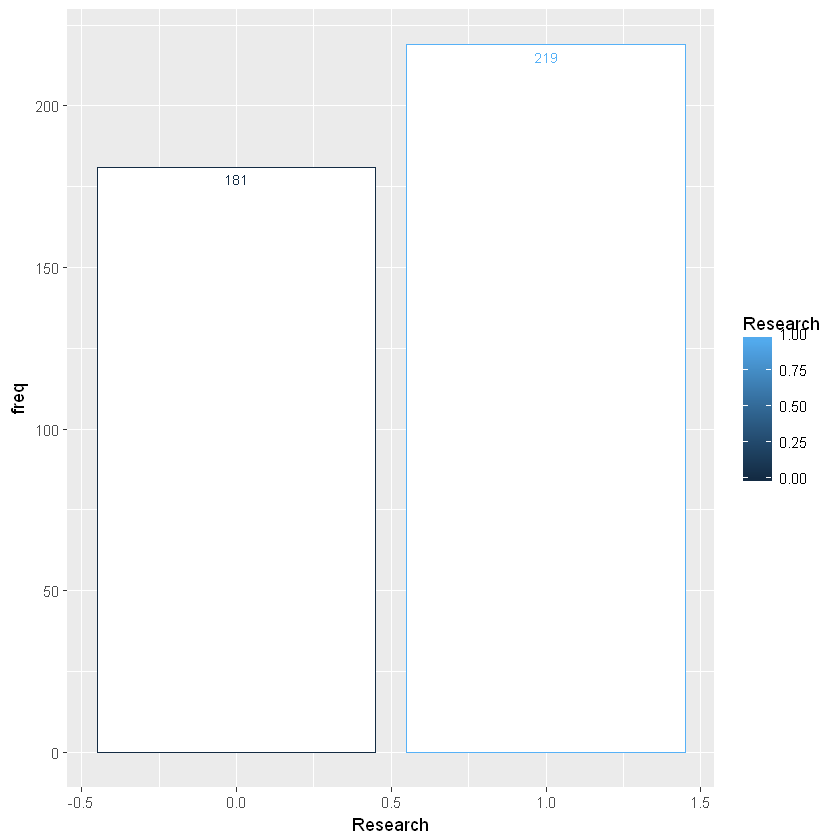

In [41]:
p<-ggplot(data=dfResearch, aes(x=Research, y=freq, color=Research)) +geom_bar(stat="identity", fill="white")+
geom_text(aes(label=freq), vjust=1.6,position = position_dodge(0.9), size=3.0)
p

Most of the students have research experience. 

In [42]:
dfLOR<-count(df, vars='LOR')
dfLOR<-dfLOR[order(dfLOR$freq),]
dfLOR$Percentage<-(dfLOR$freq/sum(dfLOR$freq))*100
dfLOR$Percentage<- paste(as.character(dfLOR$Percentage), '%', '')
rownames(dfLOR)<-NULL
dfLOR

LOR,freq,Percentage
1.0,1,0.25 %
1.5,7,1.75 %
5.0,35,8.75 %
2.0,38,9.5 %
2.5,39,9.75 %
4.5,45,11.25 %
3.5,73,18.25 %
4.0,77,19.25 %
3.0,85,21.25 %


Warning message:
"position_dodge requires non-overlapping x intervals"

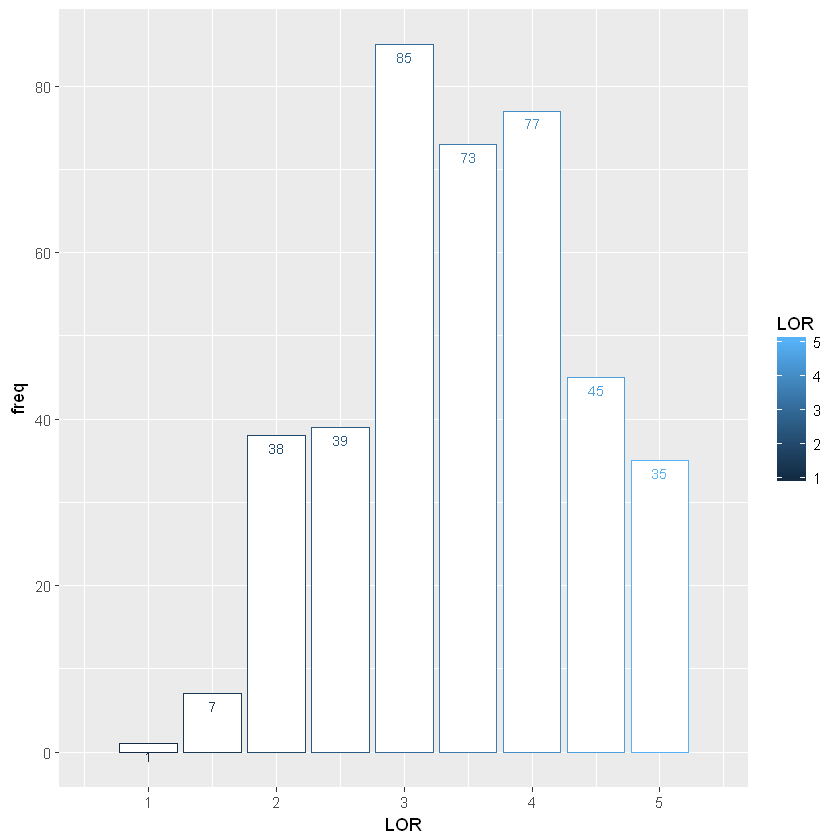

In [43]:
p<-ggplot(data=dfLOR, aes(x=LOR, y=freq, color=LOR)) +geom_bar(stat="identity", fill="white")+
geom_text(aes(label=freq), vjust=1.6,position = position_dodge(0.9), size=3.0)
p

Most students got a letter of recommendation score of 3 followed by 4 and 3.5.  Only 1 person got a score of 1. 

In [44]:
dfGPA<-count(df, vars='CGPA')
dfGPA<-dfGPA[order(dfGPA$freq),]
dfGPA$Percentage<-(dfGPA$freq/sum(dfGPA$freq))*100
dfGPA$Percentage<- paste(as.character(dfGPA$Percentage), '%', '')
rownames(dfGPA)<-NULL
dfGPA

CGPA,freq,Percentage
6.80,1,0.25 %
7.20,1,0.25 %
7.25,1,0.25 %
7.28,1,0.25 %
7.30,1,0.25 %
7.36,1,0.25 %
7.40,1,0.25 %
7.54,1,0.25 %
7.56,1,0.25 %
7.60,1,0.25 %


In [45]:
dfAdmit<-count(df, vars='Chance.of.Admit')
dfAdmit<-dfAdmit[order(dfAdmit$freq),]
dfAdmit$Percentage<-(dfAdmit$freq/sum(dfAdmit$freq))*100
dfAdmit$Percentage<- paste(as.character(dfAdmit$Percentage), '%', '')
rownames(dfAdmit)<-NULL
dfAdmit

Chance.of.Admit,freq,Percentage
0.39,1,0.25 %
0.43,1,0.25 %
0.51,1,0.25 %
0.55,1,0.25 %
0.60,1,0.25 %
0.34,2,0.5 %
0.36,2,0.5 %
0.38,2,0.5 %
0.45,2,0.5 %
0.50,2,0.5 %


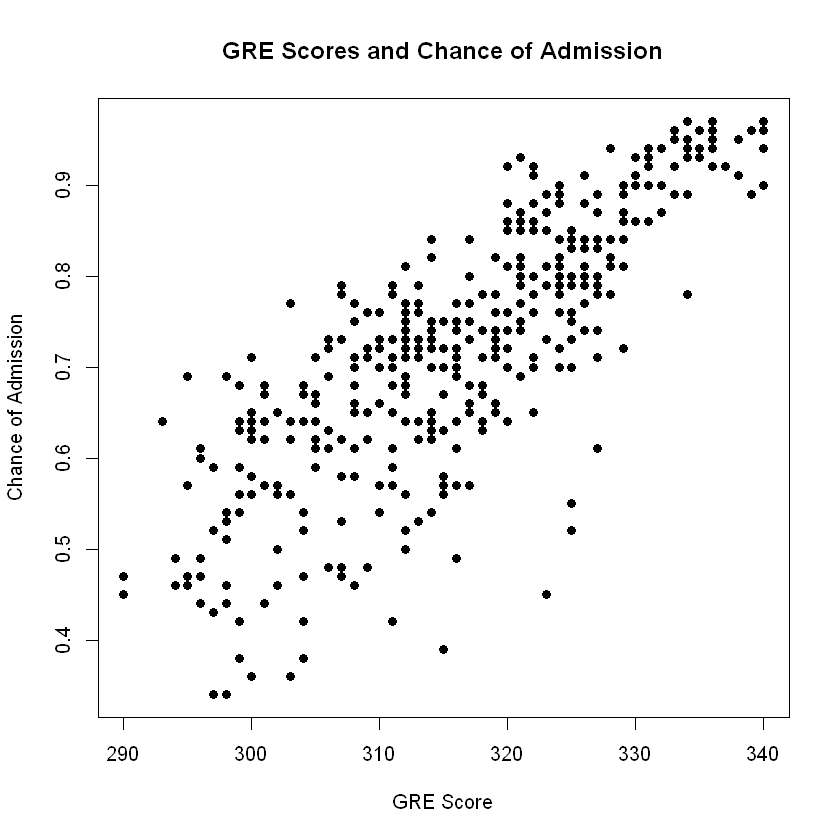

In [46]:
plot(df$GRE.Score, df$Chance.of.Admit, main="GRE Scores and Chance of Admission", 
   xlab="GRE Score", ylab="Chance of Admission", pch=19)

There seems to be a positive correlation between a higher GRE score and chance of admission. 

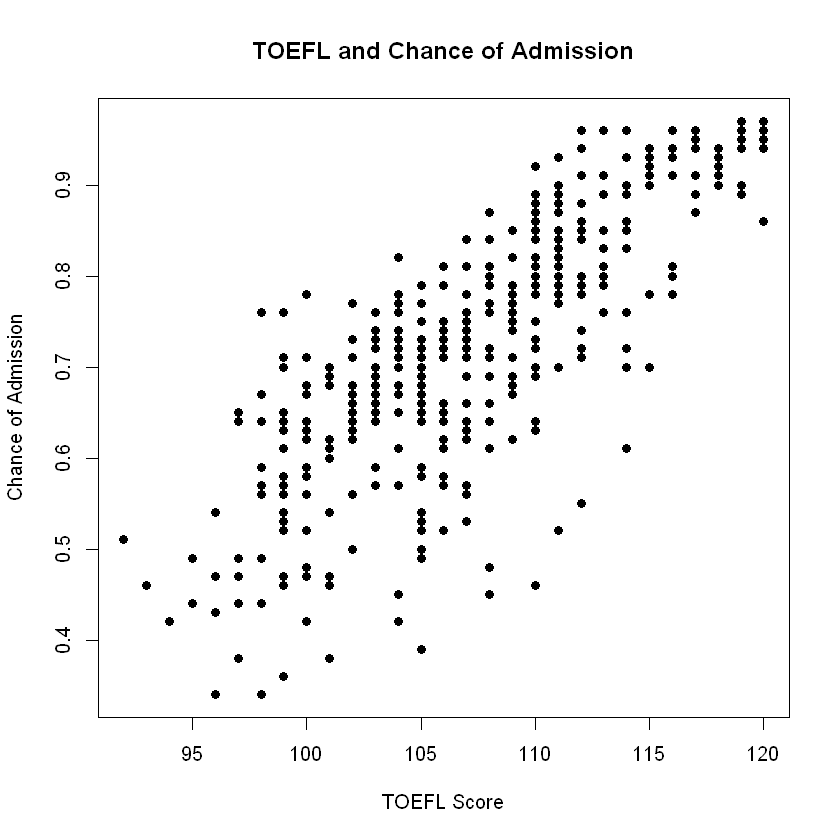

In [47]:
plot(df$TOEFL, df$Chance.of.Admit, main="TOEFL and Chance of Admission", 
   xlab="TOEFL Score", ylab="Chance of Admission", pch=19)

There seems to be a positive correlation between a higher TOEFL score and chance of admission. 

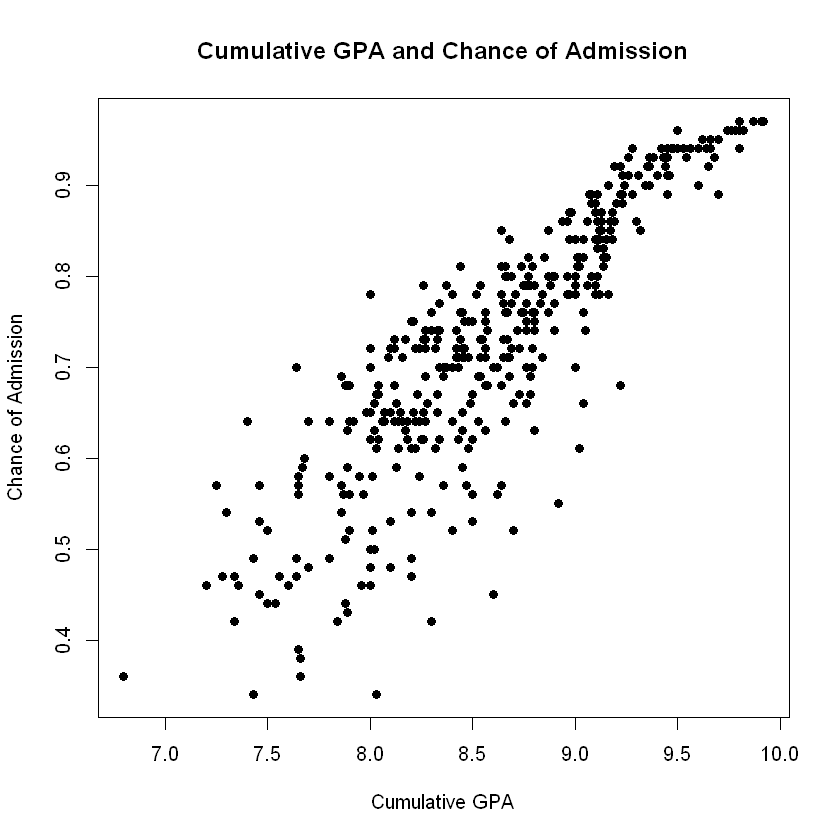

In [48]:
plot(df$CGPA, df$Chance.of.Admit, main="Cumulative GPA and Chance of Admission", 
   xlab="Cumulative GPA", ylab="Chance of Admission", pch=19)

There seems to be a positive correlation between a higher GPA score and chance of admission. 

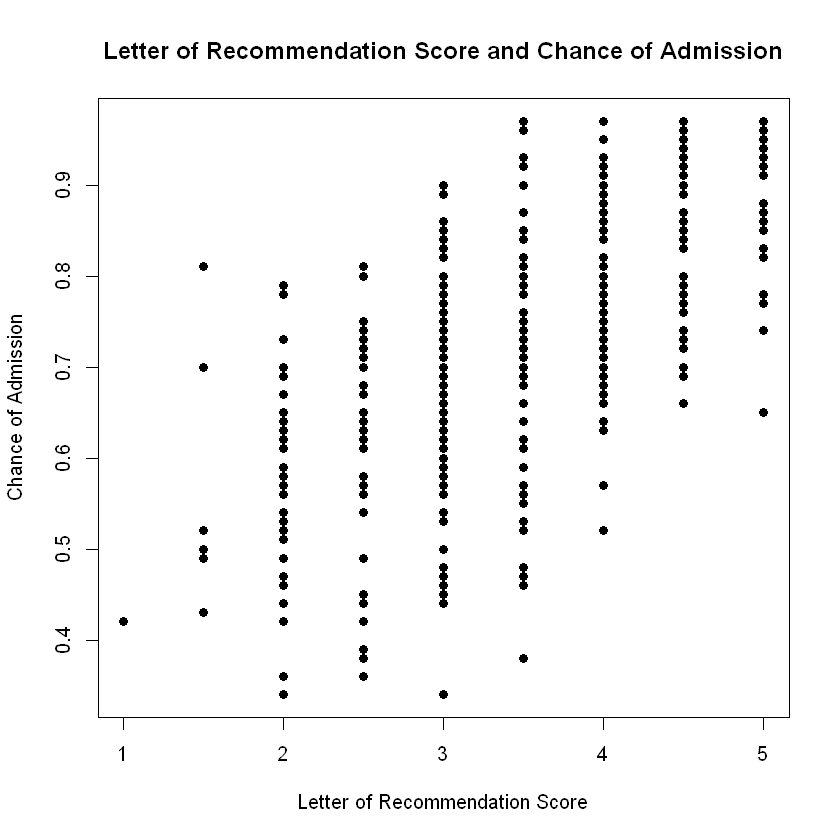

In [49]:
plot(df$LOR, df$Chance.of.Admit, main="Letter of Recommendation Score and Chance of Admission", 
   xlab="Letter of Recommendation Score", ylab="Chance of Admission", pch=19)

The letter of recommendation score alone doesn't seem to matter that much in being admitted.  

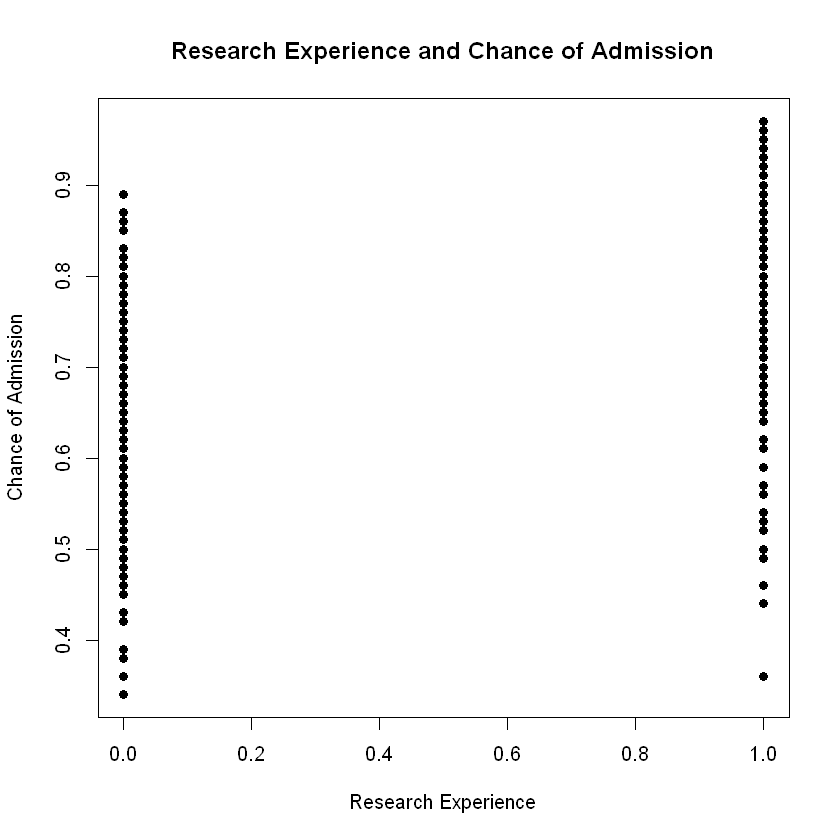

In [50]:
plot(df$Research, df$Chance.of.Admit, main="Research Experience and Chance of Admission", 
   xlab="Research Experience", ylab="Chance of Admission", pch=19)

Students with research experience seem to have a slightly higher chance of being admitted but doesn't alone seem to help.  

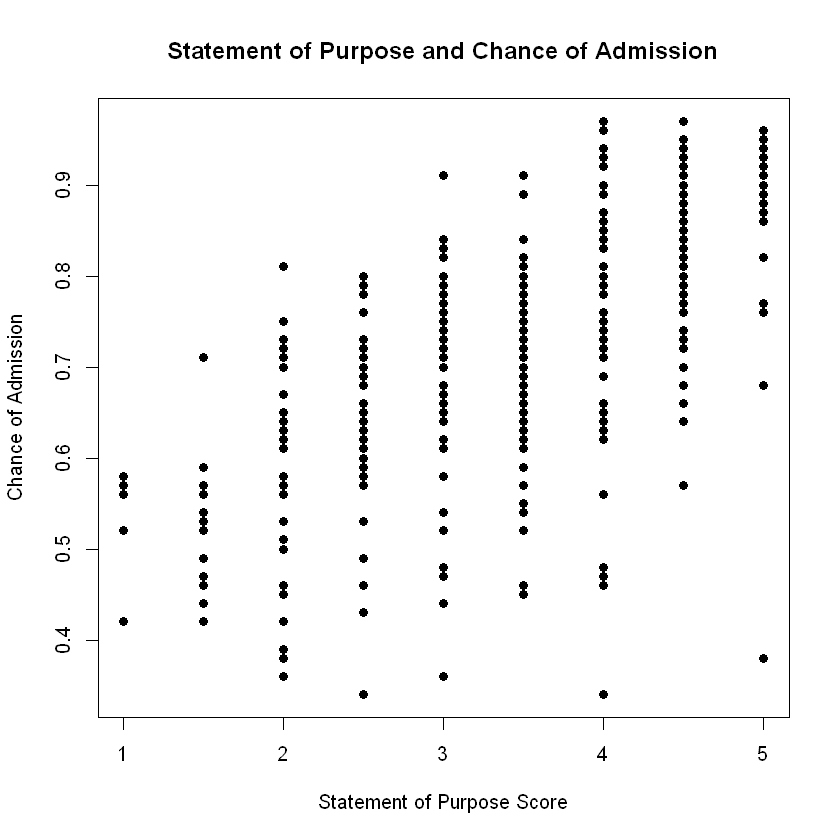

In [51]:
plot(df$SOP, df$Chance.of.Admit, main="Statement of Purpose and Chance of Admission", 
   xlab="Statement of Purpose Score", ylab="Chance of Admission", pch=19)

The statment of purpose does not seem to alone help with being admitted.

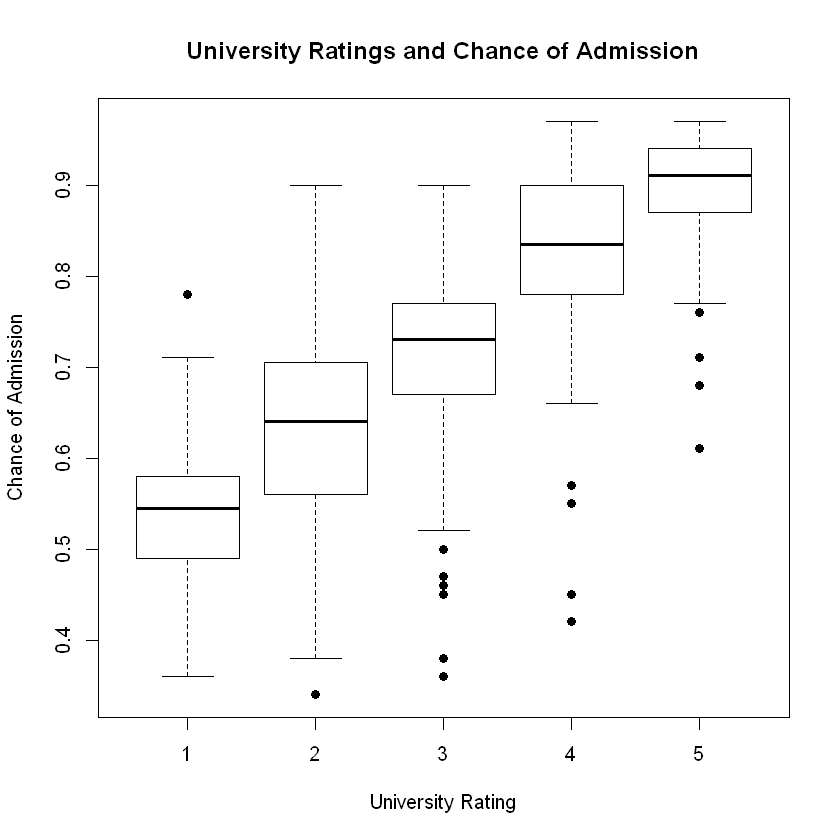

In [52]:
boxplot(df$Chance.of.Admit~df$University.Rating,data=df, main="University Ratings and Chance of Admission", 
   xlab="University Rating", ylab="Chance of Admission" , pch=19)

As expected, the higher the university rating the harder it is to be admitted.

logistic regression, random forest, gradient boosting, ensemble model

<h3> II. Modeling </h3>

**A. Logistic Regression**

In [53]:
lr<-glm(formula=Chance.of.Admit~University.Rating+SOP+LOR+Research+GRE.Score+TOEFL.Score+CGPA, data=df, family='quasibinomial')

In [54]:
lr


Call:  glm(formula = Chance.of.Admit ~ University.Rating + SOP + LOR + 
    Research + GRE.Score + TOEFL.Score + CGPA, family = "quasibinomial", 
    data = df)

Coefficients:
      (Intercept)  University.Rating                SOP                LOR  
         -9.88160            0.04652           -0.02898            0.11511  
         Research          GRE.Score        TOEFL.Score               CGPA  
          0.12856            0.01010            0.01740            0.62458  

Degrees of Freedom: 399 Total (i.e. Null);  392 Residual
Null Deviance:	    42.95 
Residual Deviance: 8.897 	AIC: NA

In the logistic regression model, slightly different results occurred.  The cumulative GPA still came out the most significant followed by research, letter of recommendation, TOEFL score, university rating, gre score.  The statement of purpose came out as not significant. 

The plots below show that logistic regression may not be the best model since it does not fit the data well. 

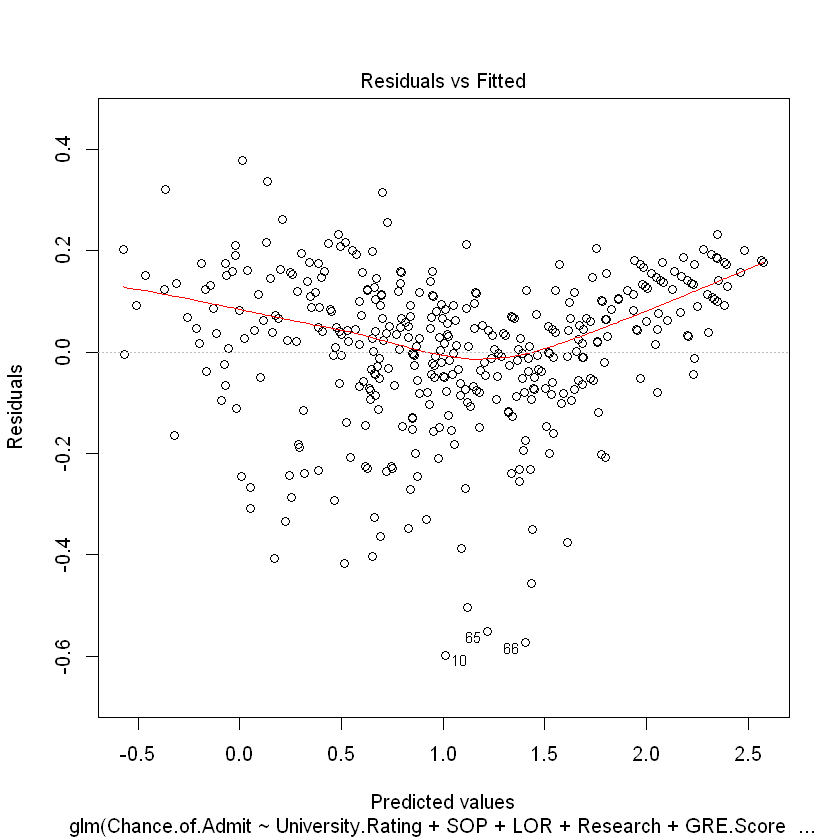

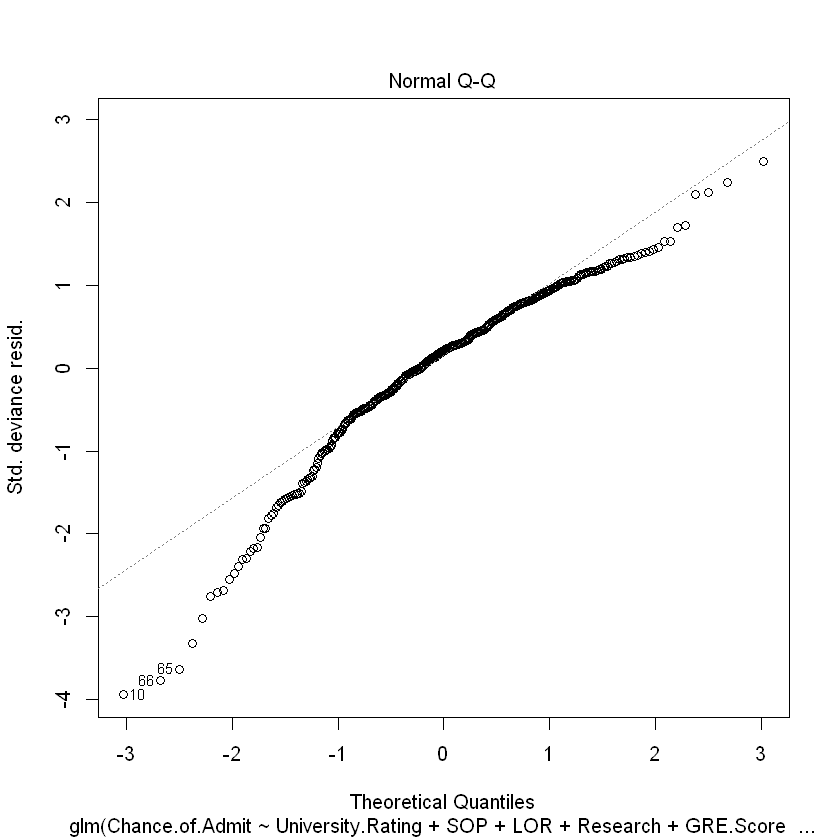

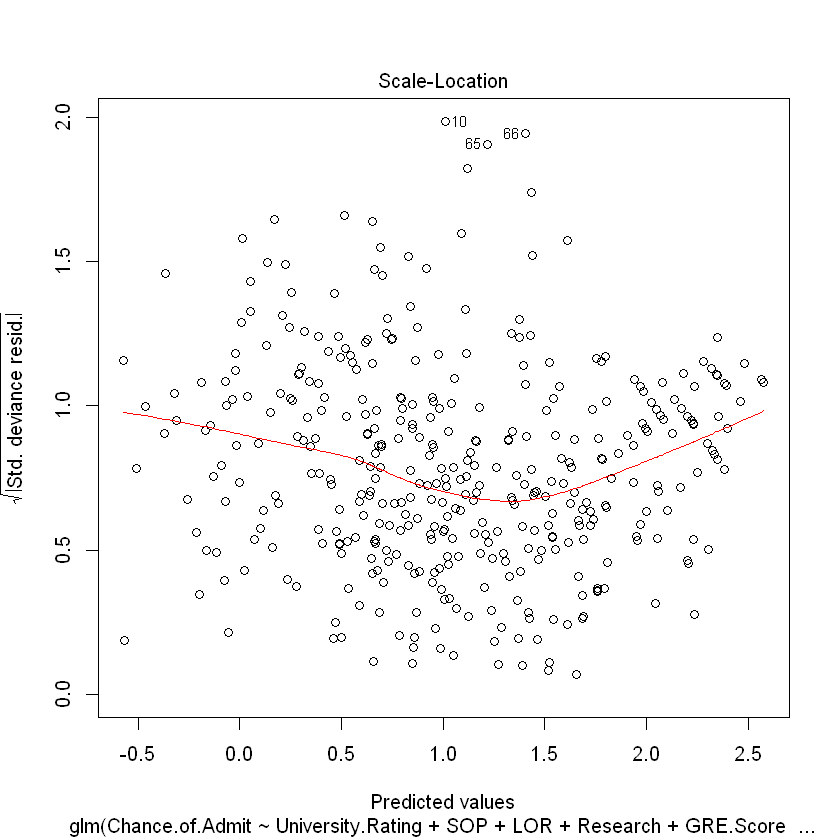

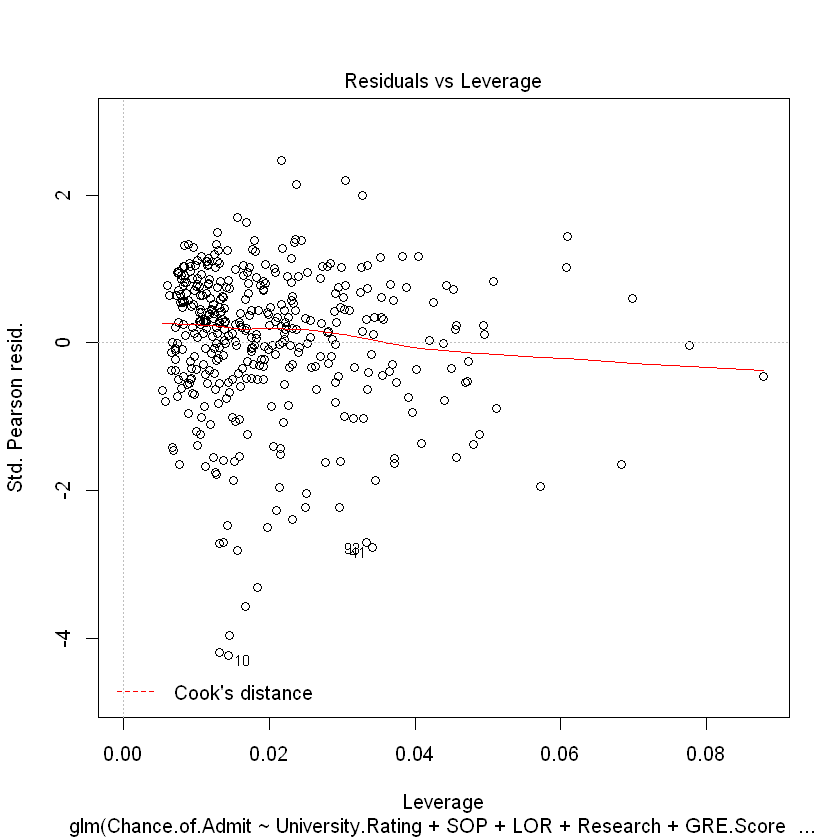

In [55]:
plot(lr)

In [56]:
odds.ratio(lr)

Waiting for profiling to be done...


,OR,2.5 %,97.5 %,p
(Intercept),5.110646e-05,1.321513e-05,0.0001972763,9.507172e-38
University.Rating,1.047619e+00,9.941271e-01,1.1040342130,8.279527e-02
SOP,9.714388e-01,9.162353e-01,1.0299314693,3.320867e-01
LOR,1.122002e+00,1.056573e+00,1.1915600867,2.009288e-04
Research,1.137190e+00,1.045691e+00,1.2366555331,2.829936e-03
GRE.Score,1.010148e+00,1.003840e+00,1.0164949859,1.703708e-03
TOEFL.Score,1.017550e+00,1.005535e+00,1.0297041221,4.306934e-03
CGPA,1.867453e+00,1.640955e+00,2.1252402357,2.723628e-19


**B. Random Forest**

In [57]:
rf<-randomForest(formula=Chance.of.Admit~University.Rating+SOP+LOR+Research+GRE.Score+TOEFL.Score+CGPA, data=df)

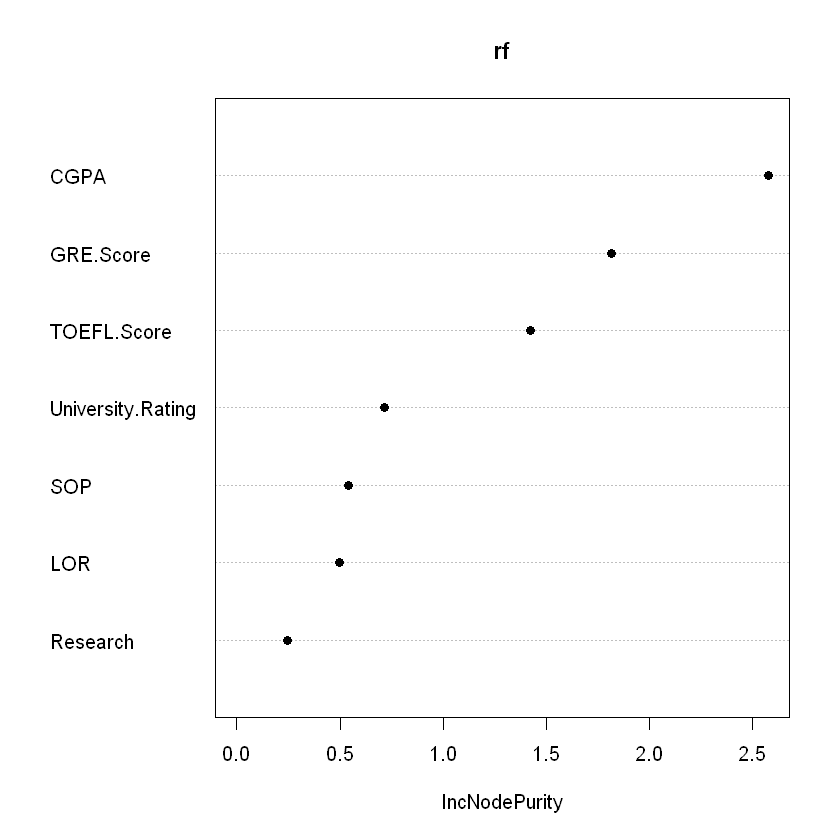

In [58]:
varImpPlot(rf,pch=19)

The cumulative GPA is the most important in graduate admissions followed by the GRE Score, TOEFL Score, University Rating, Statement of Purpose, Letter of Recommendation.  Research is the least important factor in the dataset for chance of admission.

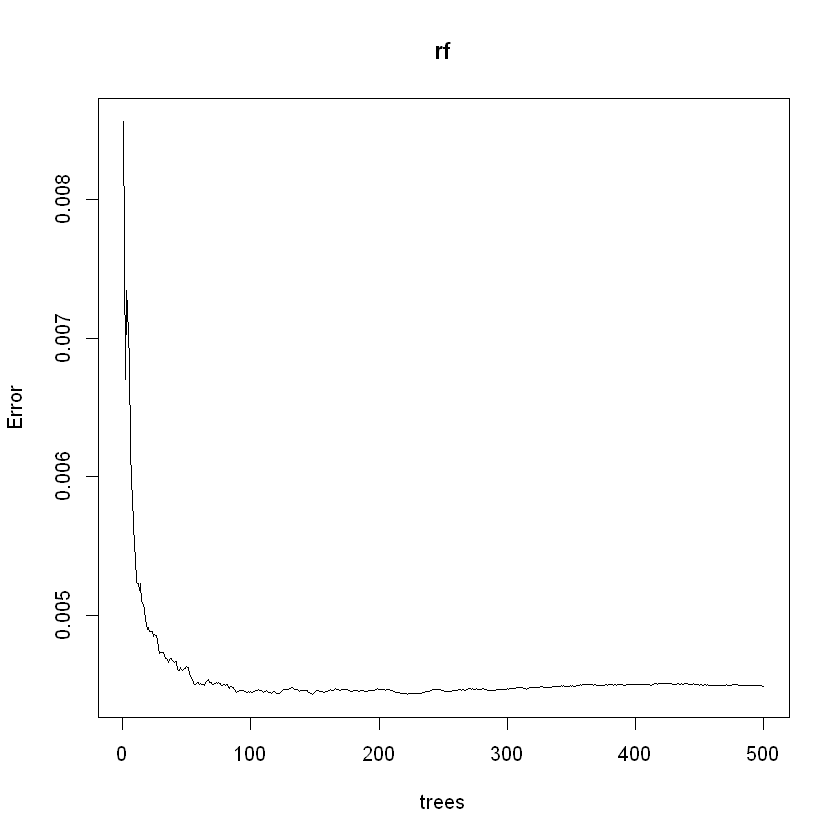

In [59]:
plot(rf)

**C. Gradient Boosting** 

In [60]:
gb<-gbm(Chance.of.Admit~University.Rating+SOP+LOR+Research+GRE.Score+TOEFL.Score+CGPA, data=df, shrinkage = 0.01, interaction.depth = 4)

Distribution not specified, assuming gaussian ...


In [61]:
gb

gbm(formula = Chance.of.Admit ~ University.Rating + SOP + LOR + 
    Research + GRE.Score + TOEFL.Score + CGPA, data = df, interaction.depth = 4, 
    shrinkage = 0.01)
A gradient boosted model with gaussian loss function.
100 iterations were performed.
There were 7 predictors of which 7 had non-zero influence.

,var,rel.inf
CGPA,CGPA,75.3549970
GRE.Score,GRE.Score,19.7264079
TOEFL.Score,TOEFL.Score,2.8033962
LOR,LOR,0.9787440
Research,Research,0.5463380
University.Rating,University.Rating,0.3659694
SOP,SOP,0.2241476


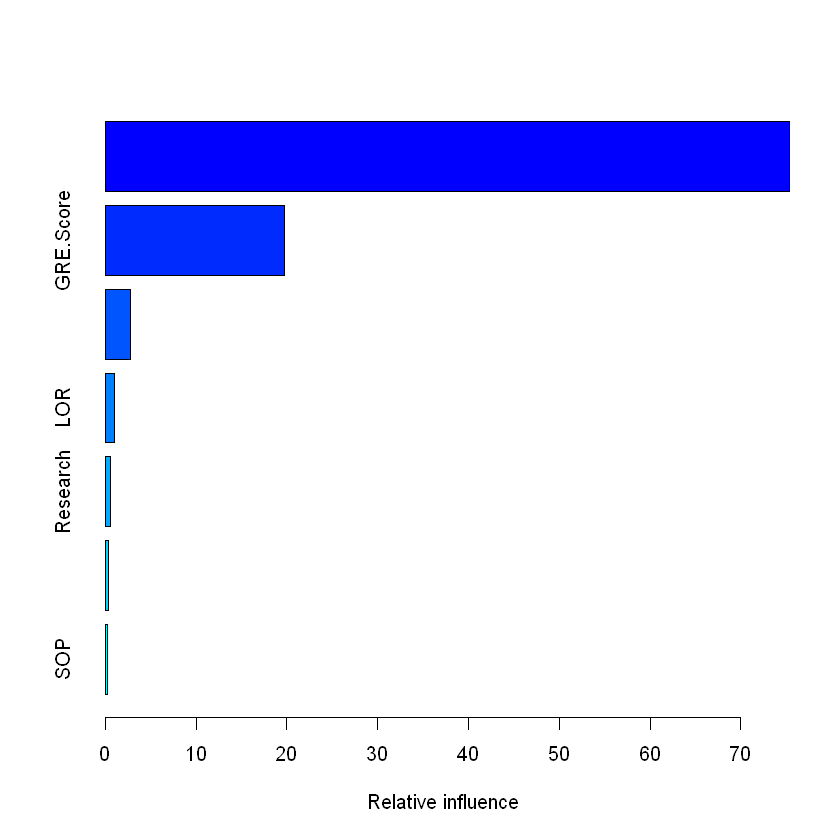

In [62]:
summary(gb)

The cumulative GPA is the most important in graduate admissions followed by the GRE Score, TOEFL Score, Letter of Recommendation, Research, University Rating.  Statement of Purpose is the least important factor in the dataset for chance of admission.  The top three categories are the same for the gradient boosting and random forest model.  However, the order of most of the other factors are different.  

Looking at some of the graphs of variables that showed up important: 

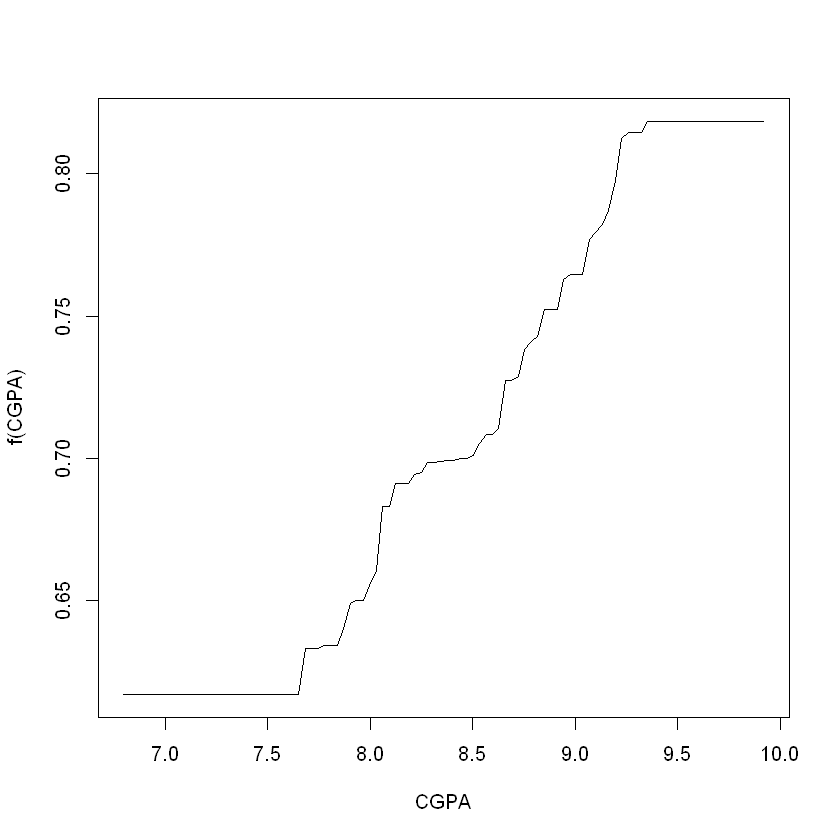

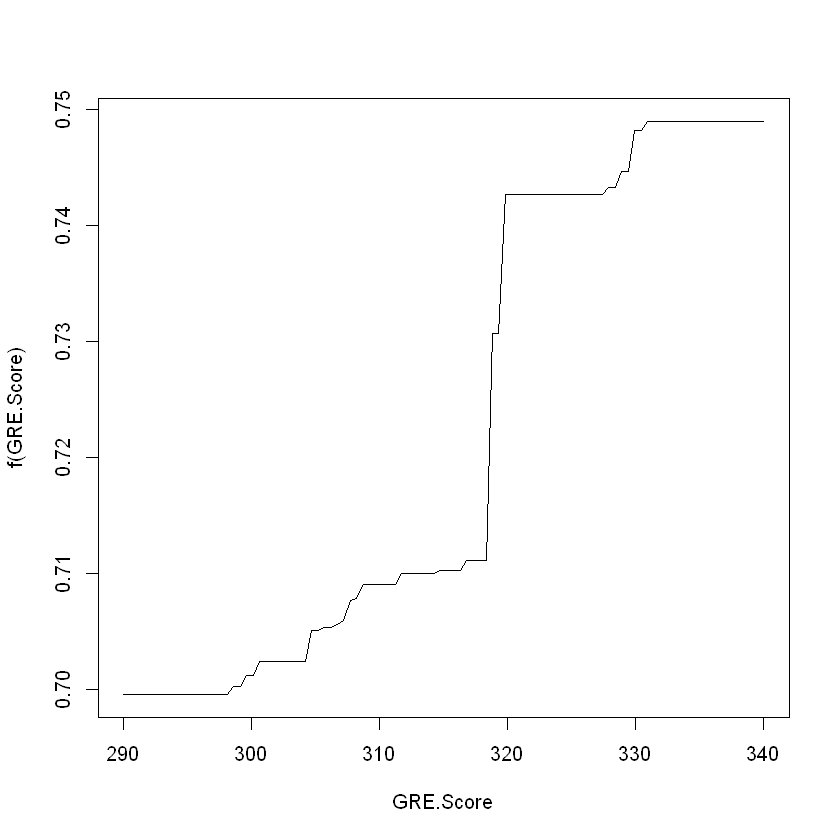

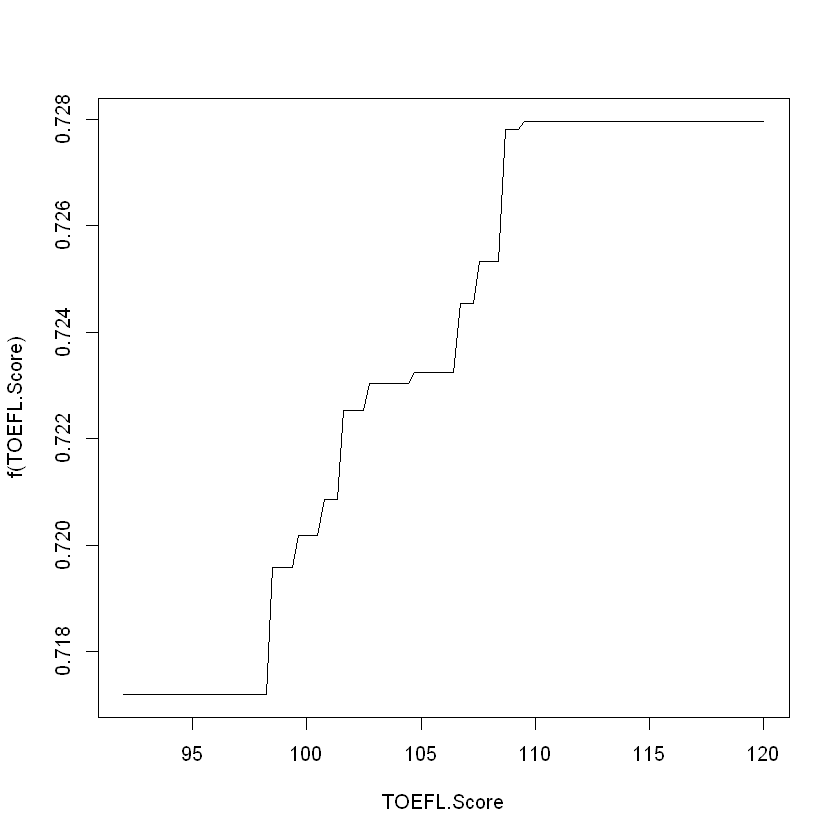

In [63]:
plot(gb, i='CGPA')
plot(gb, i='GRE.Score')
plot(gb, i='TOEFL.Score')

As you can see for most of them there is a steady increase in being admitted to grad school the higher your test scores (GRE, TOEFL) and GPA are.